In [22]:
import pandas as pd
import numpy as np 

#This dataset is from 2020 World happines report
df = pd.read_csv(r"C:\Users\45304\Downloads\Africa-well-bieng\stubbs_africahappiness.csv")
#Population as of 2022
population = pd.read_csv(r"C:\Users\45304\Downloads\Africa-well-bieng\2022_population.csv")
#Gini index, not sure if these are empiric or assumptions, also the date varies a lot.
gini_index = pd.read_csv(r"C:\Users\45304\Downloads\Africa-well-bieng\data-gini-index.csv")
#This data is collected in 2021
work_week = pd.read_csv(r"C:\Users\45304\Downloads\Africa-well-bieng\weekly-hour.csv")

In [23]:
#Concatenating the dataset by country name, 
df = pd.merge(df, population[['country', '2022_last_updated']], left_on='Country Name', right_on='country', how='inner')
df = pd.merge(df,gini_index[["country","giniWB"]],left_on="country",right_on="country",how="inner")


df["population"] = df["2022_last_updated"]
#Dropping excess columns
df.drop('country', axis=1, inplace=True)
df.drop("2022_last_updated",axis=1,inplace=True)

#Dropping all countries outside of africa
df.drop(df[~(df['Regional Indicator'] == "Africa")].index, inplace=True)
df['population'] = df['population'].str.replace(',', '').astype(int)


#Scalling the gini coefficent to values between 0 and 1
df["giniWB"] = [coeff / 100 for coeff in df["giniWB"]]

In [4]:
df.to_csv("ConcatenatedDataOfAfrica.csv",index=True)

Setting the theme for our plots


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_style = {
    "figure.figsize": (12, 7),
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "grid.color": "#e2e2e2",
    "axes.edgecolor": "#e2e2e2",
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial", "sans-serif"],
}

# Set the custom style
plt.style.use(custom_style)
# Save the style
plt.style.use(custom_style)
plt.savefig("custom_style.png", dpi=300, bbox_inches="tight")


<Figure size 864x504 with 0 Axes>

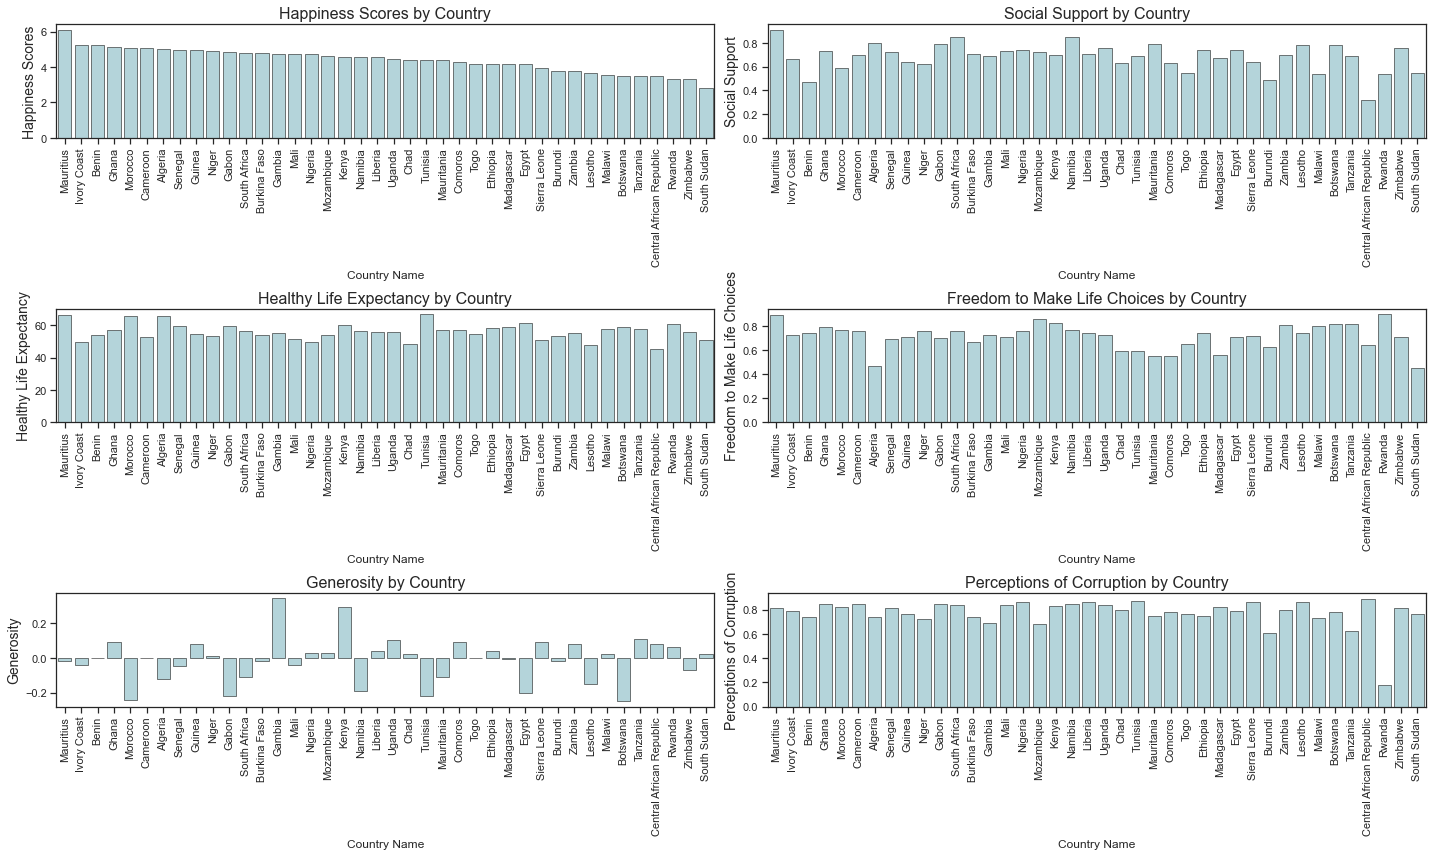

In [19]:
attributes =["Happiness Scores","Social Support","Healthy Life Expectancy","Freedom to Make Life Choices","Generosity","Perceptions of Corruption","population"]

fig,ax = plt.subplots(3,2,figsize=(20,12))
ax = ax.flatten()

for i in range (len(attributes)-1):
    current_ax = ax[i]
    variable = attributes[i]
    df[variable]=pd.to_numeric(df[variable], errors="coerce")
    sns.barplot(ax=current_ax,y = variable,x="Country Name", linewidth=0.5, edgecolor="black",data=df,color="#AED9E0")
    current_ax.set_ylabel(variable, fontsize=14)
    current_ax.set_title(variable+ " by Country", fontsize=16)
    current_ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()


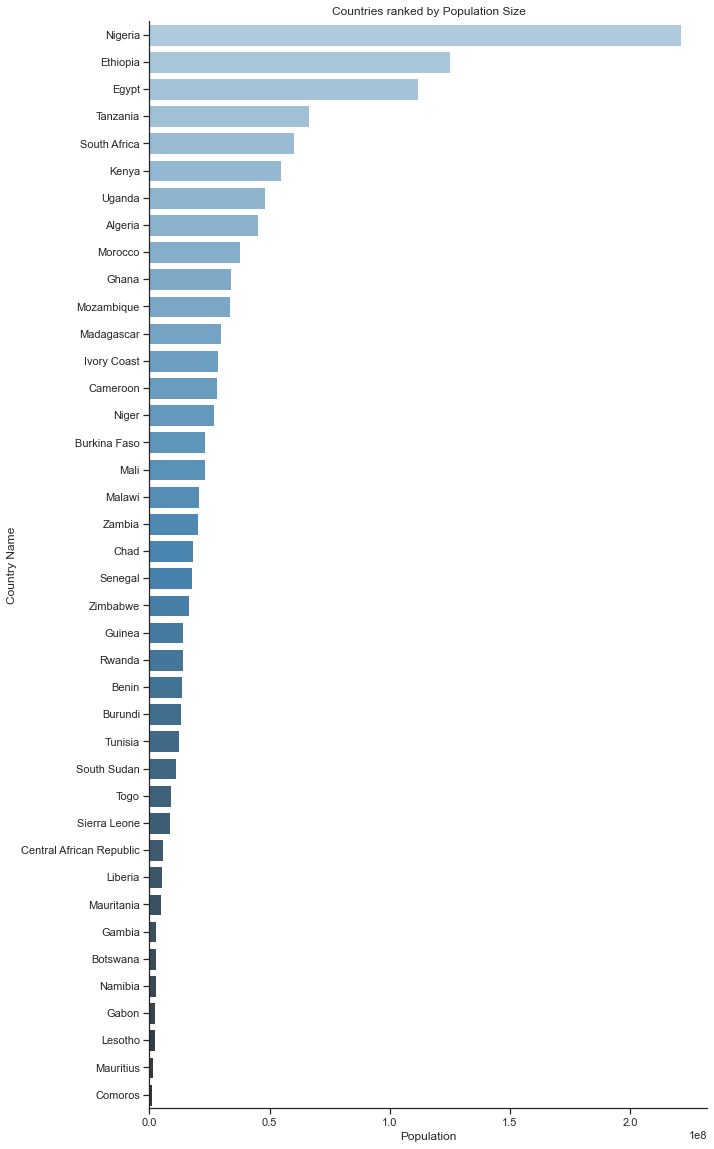

In [18]:
# Plot the results
%matplotlib inline
df_sorted = df.sort_values('population', ascending=False)

# Get a list of country names sorted by population size
countries_sorted = df_sorted['Country Name'].tolist()

# Plot the results in descending order
sns.set_style("whitegrid")
sns.set_style("ticks")
plt.figure(figsize=(10, 20))
ax = sns.barplot(y="Country Name", x="population", data=df_sorted, palette="Blues_d", )
ax.set(xlabel='Population', ylabel='Country Name')
ax.set_title('Countries ranked by Population Size')
sns.despine()
    

Text(0.5, 1.0, 'Correlation heatmap')

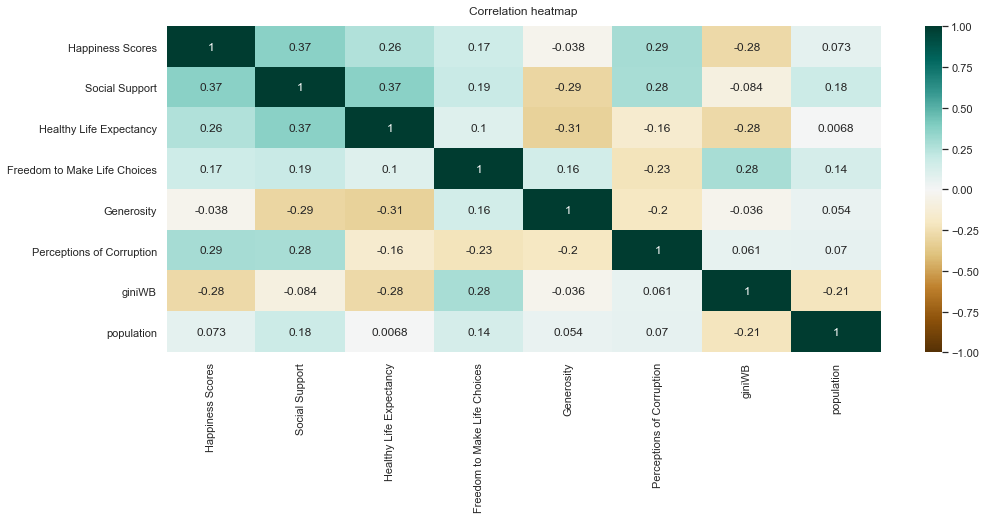

In [24]:
plt.figure(figsize=(16,6))
sns.set_theme()
heatmap = sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title("Correlation heatmap",fontdict={'fontsize':12},pad=12)

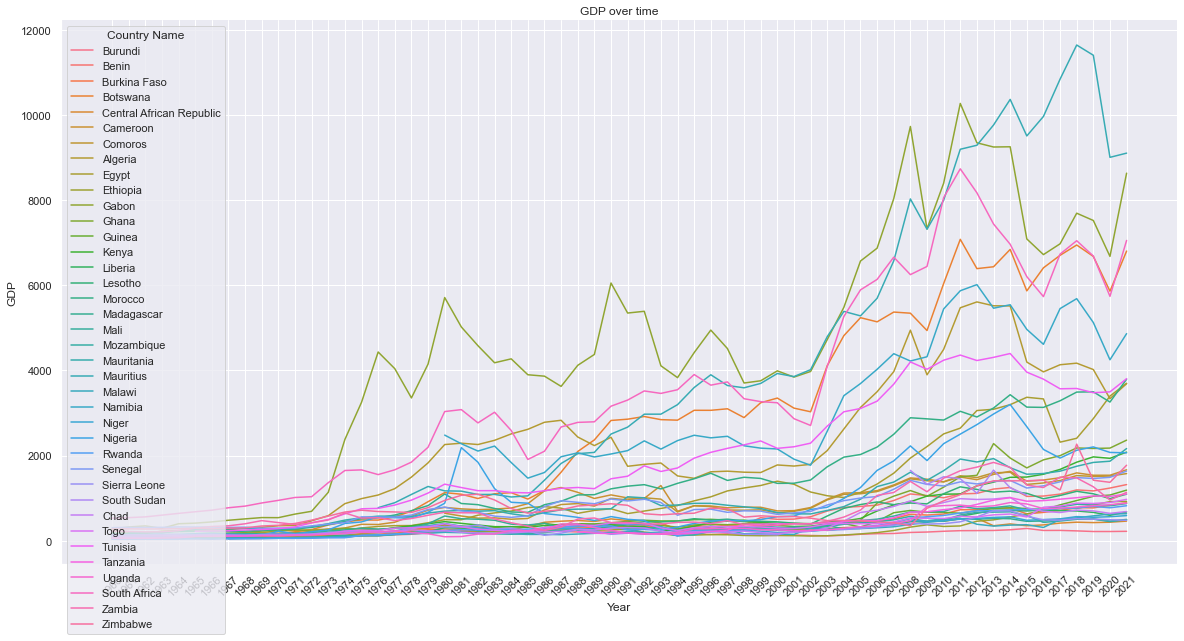

In [25]:
countries = df["Country Name"].unique()
gdp = pd.read_csv("../GDP.csv")
gdp = gdp[gdp["Country Name"].isin(countries)]
gdp.dropna()

id_vars = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]

melted_df = pd.melt(gdp, id_vars=id_vars, var_name="Year", value_name="GDP")

plt.figure(figsize=(20,10))
sns.lineplot(x="Year",y="GDP",hue="Country Name", data = melted_df)
plt.title("GDP over time")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.xticks(rotation=45)
sns.despine()